# Warm up
Let's start with some warm up exercises to get you familiar with the database and do some SQL querying.
Make sure to have downloaded the NBA dataset form Kaggle as described in the README.

In [21]:
import sqlite3 as sql
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## TODO: Use pathlib to get the path to the data directory. Path(__file__) won't work in a Jupyter notebook.
DATA_PATH = Path.cwd() / 'data' / 'nba.sqlite'

## Create a SQLite connection and run some SQL queries

In [22]:
con = sql.connect(DATA_PATH)  # connect to the database
query = 'SELECT * FROM game LIMIT 10'  # write a query that selects the first 10 rows from the game table
top_10_game = pd.read_sql(query, con)  # read the query into a pandas dataframe
top_10_game.head() # print the dataframe

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,0024600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,None,None,None,None,None,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,0024600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,None,None,None,None,None,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,0024600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,None,None,None,None,None,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,0024600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,None,None,None,None,None,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,0024600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,None,None,None,None,None,NaN,50.0,17,0,Regular Season


In [23]:
# let's look at the schema of the database
# TODO: sqlite_master is the name of the table you want to inspeact: Replace TABLE_NAME with the name of the table you want to inspect
query = """
    SELECT *
    FROM sqlite_master
    WHERE type='table';
"""

pd.read_sql(query, con).sort_values('name')

,type,name,tbl_name,rootpage,sql
10,table,common_player_info,common_player_info,4314,"CREATE TABLE ""common_player_info"" (\n""person_i..."
13,table,draft_combine_stats,draft_combine_stats,4313,"CREATE TABLE ""draft_combine_stats"" (\n""season""..."
14,table,draft_history,draft_history,4318,"CREATE TABLE ""draft_history"" (\n""person_id"" TE..."
0,table,game,game,52,"CREATE TABLE ""game"" (\n""season_id"" TEXT,\n ""t..."
5,table,game_info,game_info,9457,"CREATE TABLE ""game_info"" (\n""game_id"" TEXT,\n ..."
1,table,game_summary,game_summary,4564,"CREATE TABLE ""game_summary"" (\n""game_date_est""..."
4,table,inactive_players,inactive_players,7443,"CREATE TABLE ""inactive_players"" (\n""game_id"" T..."
6,table,line_score,line_score,10084,"CREATE TABLE ""line_score"" (\n""game_date_est"" T..."
3,table,officials,officials,6747,"CREATE TABLE ""officials"" (\n""game_id"" TEXT,\n ..."
2,table,other_stats,other_stats,6025,"CREATE TABLE ""other_stats"" (\n""game_id"" TEXT,\..."


In [24]:
# let's see all the tables we have in the database
# TODO: Filter for tables only
query = """
    SELECT name
    FROM sqlite_master
    WHERE type = 'table'
"""
pd.read_sql(query, con)

,name
0,game
1,game_summary
2,other_stats
3,officials
4,inactive_players
5,game_info
6,line_score
7,play_by_play
8,player
9,team


In [26]:
# let's have a look at the columns in the game table
query = """
    PRAGMA table_info(draft_combine_stats)
"""
pd.read_sql(query, con)

,cid,name,type,notnull,dflt_value,pk
0,0,season,TEXT,0,None,0
1,1,player_id,TEXT,0,None,0
2,2,first_name,TEXT,0,None,0
3,3,last_name,TEXT,0,None,0
4,4,player_name,TEXT,0,None,0
5,5,position,TEXT,0,None,0
6,6,height_wo_shoes,REAL,0,None,0
7,7,height_wo_shoes_ft_in,TEXT,0,None,0
8,8,height_w_shoes,REAL,0,None,0
9,9,height_w_shoes_ft_in,TEXT,0,None,0


In [27]:
# let's find the earliest recorded game
query = """
    SELECT game_date
    FROM game
    ORDER BY game_date
    LIMIT 1
"""

print(pd.read_sql(query, con))

# let's find the latest recorded game
query = """
    SELECT game_date
    FROM game
    ORDER BY game_date DESC
    LIMIT 1
"""

print(pd.read_sql(query, con))


             game_date
0  1946-11-01 00:00:00
             game_date
0  2023-06-12 00:00:00


In [ ]:
# TODO: Find four interesting facts about the data and write a query to find the answer

In [ ]:
#sight 1
query = """
    SELECT height_w_shoes AS height, max_vertical_leap AS vertical_leap
    FROM draft_combine_stats
    WHERE height_w_shoes IS NOT NULL AND max_vertical_leap IS NOT NULL
"""
df1 = pd.read_sql(query, con)
df1


To see if taller players generally have a lower or higher vertical leap, we can analyze the height_w_shoes and max_vertical_leap columns. This insight could reveal if taller players tend to have lower verticals or if there's no significant correlation.

In [28]:
# Assuming df is the DataFrame resulting from the query
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='height', y='vertical_leap')
plt.title('Correlation between Height and Vertical Leap')
plt.xlabel('Height')
plt.ylabel('Max Vertical Leap')
plt.grid(True)
plt.show()

NameError: name 'df1' is not defined

<Figure size 1000x600 with 0 Axes>

In [30]:
#sight 2
query = """
    SELECT position, player_name, three_quarter_sprint
    FROM draft_combine_stats
    WHERE three_quarter_sprint IS NOT NULL
    ORDER BY three_quarter_sprint ASC
    LIMIT 10
"""
df2 = pd.read_sql(query, con)
df2


,position,player_name,three_quarter_sprint
0,SG-PG,Cookie Belcher,2.91
1,PG,Jason Gardner,2.92
2,PG,Nate Robinson,2.96
3,SG-SF,Sonny Weems,2.96
4,SG-SF,AJ Lawson,2.98
5,SF,Scottie Lewis,2.98
6,SF-PF,Joe Alexander,2.99
7,SF,Schea Cotton,3.00
8,PG,SirValiant Brown,3.00
9,PG-SG,Will Bynum,3.00


Examining the three_quarter_sprint column can help identify the fastest sprint times by player position. This insight would highlight which positions tend to have the fastest sprint speeds and which individual players stand out.

In [29]:
#sight 3
query = """

    SELECT 
        AVG(CAST(spot_nba_corner_left AS FLOAT)) AS nba_corner_left_accuracy,
        AVG(CAST(spot_nba_top_key AS FLOAT)) AS nba_top_key_accuracy,
        AVG(CAST(spot_college_top_key AS FLOAT)) AS college_top_key_accuracy,
        AVG(CAST(off_drib_college_top_key AS FLOAT)) AS off_drib_college_accuracy
    FROM draft_combine_stats
    WHERE 
        spot_nba_corner_left IS NOT NULL 
        AND spot_nba_top_key IS NOT NULL
        AND spot_college_top_key IS NOT NULL
        AND off_drib_college_top_key IS NOT NULL
"""
df3 = pd.read_sql(query, con)
df3


,nba_corner_left_accuracy,nba_top_key_accuracy,college_top_key_accuracy,off_drib_college_accuracy
0,2.884615,2.884615,2.846154,3.307692


In [ ]:
# Reshape the DataFrame for easier plotting (if necessary)
accuracy_df = pd.DataFrame({
    'Shot Type': ['NBA Corner Left', 'NBA Top Key', 'College Top Key', 'Off-Dribble College'],
    'Accuracy': [df3['nba_corner_left_accuracy'].iloc[0],
                 df3['nba_top_key_accuracy'].iloc[0],
                 df3['college_top_key_accuracy'].iloc[0],
                 df3['off_drib_college_accuracy'].iloc[0]]
})

plt.figure(figsize=(10, 6))
sns.barplot(data=accuracy_df, x='Shot Type', y='Accuracy', palette='viridis')
plt.title('Shooting Accuracy by Shot Type')
plt.xlabel('Shot Type')
plt.ylabel('Average Shooting Accuracy (%)')
plt.ylim(0, 100)
plt.show()


# Insight 4: Comparing teams with the most home and away wins all time

In [ ]:
# Insight 4: Examining the table

# let's have a look at the columns in the x table
query = """
    PRAGMA table_info(game)
"""
pd.read_sql(query, con)



,cid,name,type,notnull,dflt_value,pk
0,0,season_id,TEXT,0,None,0
1,1,team_id_home,TEXT,0,None,0
2,2,team_abbreviation_home,TEXT,0,None,0
3,3,team_name_home,TEXT,0,None,0
4,4,game_id,TEXT,0,None,0
5,5,game_date,TIMESTAMP,0,None,0
6,6,matchup_home,TEXT,0,None,0
7,7,wl_home,TEXT,0,None,0
8,8,min,INTEGER,0,None,0
9,9,fgm_home,REAL,0,None,0


In [49]:
# Insight 4: Teams with the most wins at home all time

query = """
	SELECT team_name_home, COUNT(*) as wins
	FROM game
	WHERE wl_home = 'W'
	GROUP BY team_name_home
	ORDER BY wins DESC
"""

Home_wins_df = pd.read_sql(query, con)
Home_wins_df

,team_name_home,wins
0,Boston Celtics,2200
1,Los Angeles Lakers,1850
2,New York Knicks,1763
3,Detroit Pistons,1522
4,Phoenix Suns,1480
...,...,...
76,Istanbul Fenerbahce Ulker,1
77,Berlin Alba Berlin,1
78,Barcelona Winterthur FC,1
79,Barcelona Regal FC,1


In [48]:
# Insight 4: Teams with the most away wins all time

query = """
	SELECT team_name_away, COUNT(*) as wins
	FROM game
	WHERE wl_away = 'W'
	GROUP BY team_name_away
	ORDER BY wins DESC
"""

Away_wins_df = pd.read_sql(query, con)
Away_wins_df

,team_name_away,wins
0,Boston Celtics,1425
1,Los Angeles Lakers,1273
2,New York Knicks,1100
3,Philadelphia 76ers,995
4,San Antonio Spurs,979
...,...,...
72,Waterloo Hawks,2
73,Team Giannis,2
74,Moscow CSKA,2
75,Istanbul Fenerbahce Sports Club,1


In [56]:
# Insight 4: Merging the data and data wrangling

# Inner join to remove irrelevant 1 off games with non NBA teams

wins_all_time = pd.merge(Home_wins_df, Away_wins_df, left_on='team_name_home', right_on='team_name_away', how='inner')
wins_all_time['total_wins'] = wins_all_time['wins_x'] + wins_all_time['wins_y']
wins_all_time["wins_home"] = wins_all_time["wins_x"]
wins_all_time["wins_away"] = wins_all_time["wins_y"]
wins_all_time["team_name"] = wins_all_time["team_name_home"]
wins_all_time = wins_all_time[["team_name", "wins_home", "wins_away", "total_wins"]]
wins_all_time = wins_all_time[wins_all_time['total_wins'] >= 100]
wins_all_time["pct_wins_at_home"] = wins_all_time["wins_home"] / wins_all_time["total_wins"]*100
wins_all_time


,team_name,wins_home,wins_away,total_wins,pct_wins_at_home
0,Boston Celtics,2200,1425,3625,60.689655
1,Los Angeles Lakers,1850,1273,3123,59.237912
2,New York Knicks,1763,1100,2863,61.578764
3,Detroit Pistons,1522,926,2448,62.173203
4,Phoenix Suns,1480,944,2424,61.056106
5,Philadelphia 76ers,1467,995,2462,59.585703
6,San Antonio Spurs,1448,979,2427,59.662134
7,Chicago Bulls,1443,934,2377,60.706773
8,Milwaukee Bucks,1425,920,2345,60.767591
9,Portland Trail Blazers,1422,852,2274,62.532982


## Visualisation showing the number of home and away wins by team, all time.

<Figure size 1000x600 with 0 Axes>

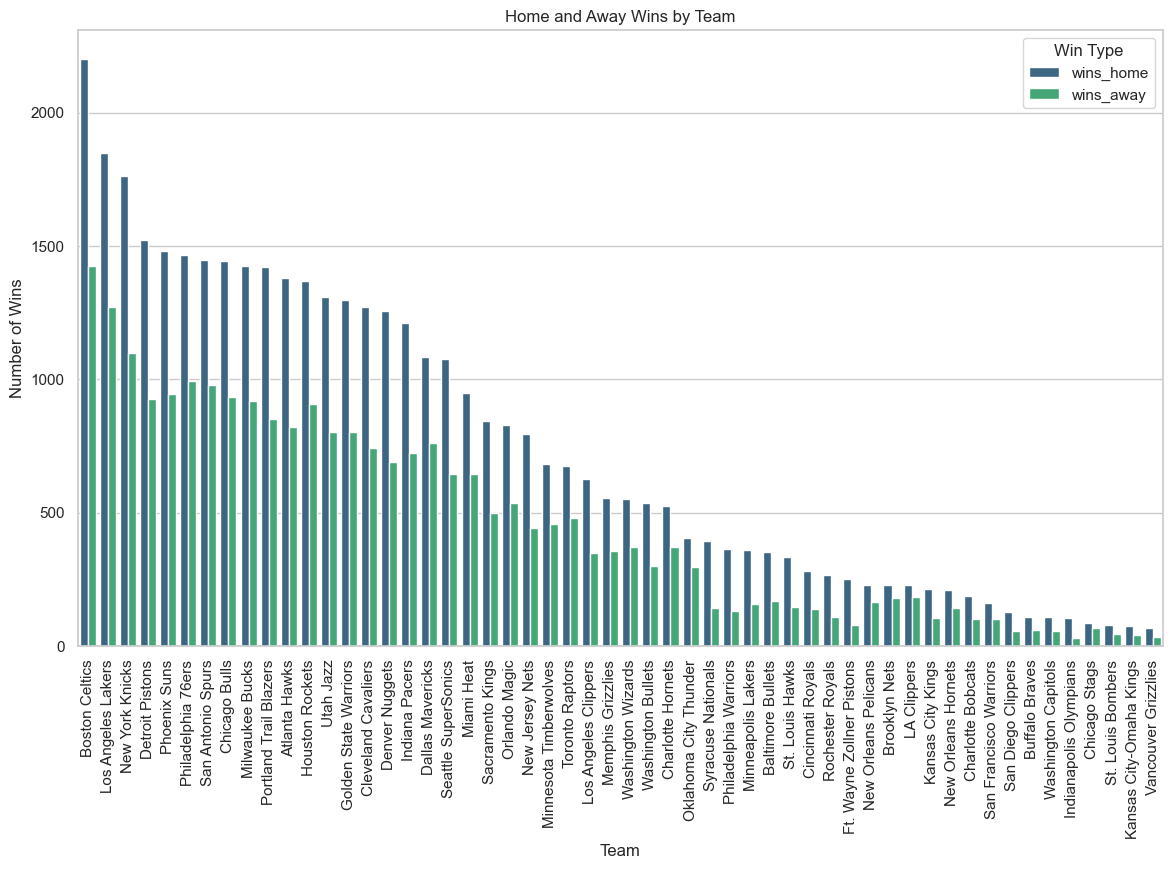

In [57]:
# Insight 4: Plotting the data

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
wins_all_time_melted = wins_all_time.melt(id_vars="team_name", value_vars=["wins_home", "wins_away"], var_name="Win Type", value_name="Wins")

plt.figure(figsize=(14, 8))
sns.barplot(data=wins_all_time_melted, x="team_name", y="Wins", hue="Win Type", palette="viridis")

plt.title('Home and Away Wins by Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.legend(title='Win Type')
plt.show()


## Visualisation showing the team's with the historically greatest home advantage

/var/folders/x2/v6_n6w9s7pj21fnhqthct3340000gn/T/ipykernel_27637/574690957.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=wins_all_time, x='team_name', y='pct_wins_at_home', palette='viridis')


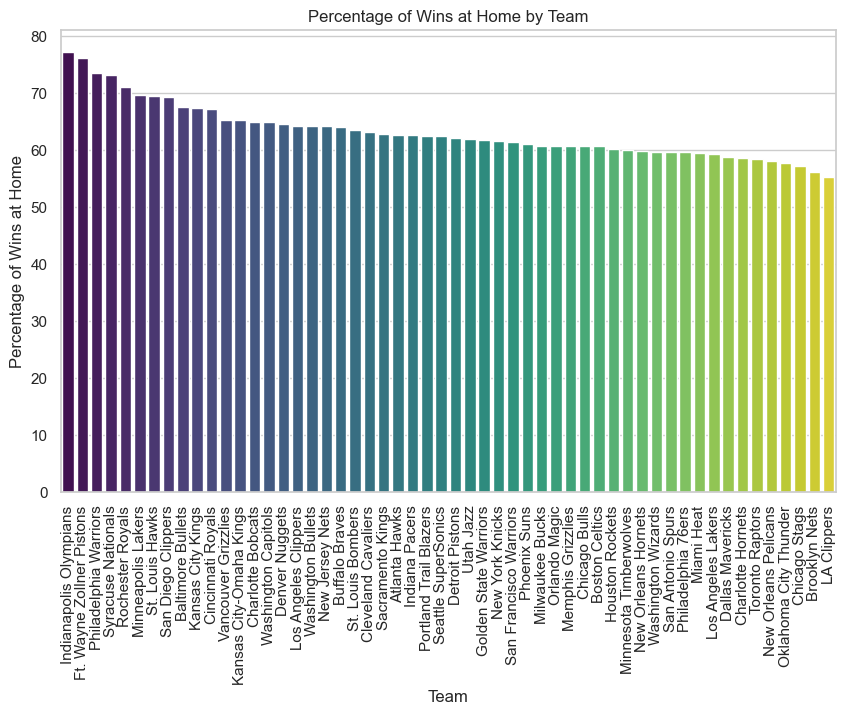

In [59]:
# Insight 4: Second plot

wins_all_time = wins_all_time.sort_values('pct_wins_at_home', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=wins_all_time, x='team_name', y='pct_wins_at_home', palette='viridis')
plt.title('Percentage of Wins at Home by Team')
plt.xlabel('Team')
plt.ylabel('Percentage of Wins at Home')
plt.xticks(rotation=90)
plt.show()